In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def sample_image(img, factor):
    # Downsample and then upsample to simulate loss
    down = cv2.resize(img, (img.shape[1] // factor, img.shape[0] // factor), interpolation=cv2.INTER_NEAREST)
    up = cv2.resize(down, (img.shape[1], img.shape[0]), interpolation=cv2.INTER_NEAREST)
    return up

In [3]:
def quantize_image(img, levels):
    # Quantize grayscale image to given number of levels
    quantized = np.floor(img / (256 / levels)) * (256 / levels)
    return quantized.astype(np.uint8)

In [5]:
def analyze_quantized_levels(img, color_space):
    if color_space == 'RGB':
        print(f"\nUnique R levels: {np.unique(img[:, :, 0])}")
        print(f"Unique G levels: {np.unique(img[:, :, 1])}")
        print(f"Unique B levels: {np.unique(img[:, :, 2])}")
    elif color_space == 'HSV':
        hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        print(f"\nUnique H levels: {np.unique(hsv[:, :, 0])}")
        print(f"Unique S levels: {np.unique(hsv[:, :, 1])}")
        print(f"Unique V levels: {np.unique(hsv[:, :, 2])}")

In [11]:
image = cv2.imread("img1.jpg")
if image is None:
    print("Image not found!")
    exit()

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

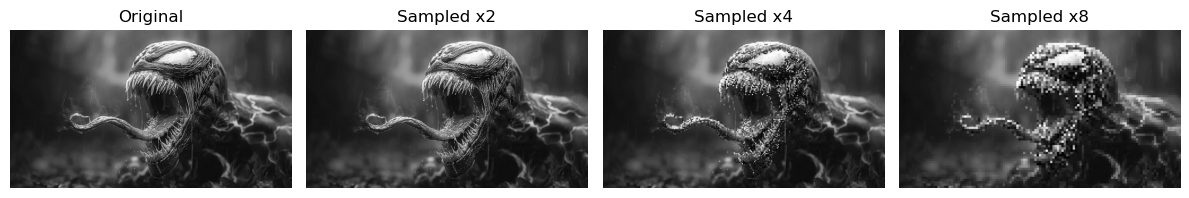

In [13]:
sample_factors = [2, 4, 8]
plt.figure(figsize=(12, 4))
plt.subplot(1, len(sample_factors)+1, 1)
plt.imshow(gray, cmap='gray')
plt.title("Original")
plt.axis('off')

for i, factor in enumerate(sample_factors):
    sampled = sample_image(gray, factor)
    plt.subplot(1, len(sample_factors)+1, i+2)
    plt.imshow(sampled, cmap='gray')
    plt.title(f"Sampled x{factor}")
    plt.axis('off')
plt.tight_layout()
plt.show()


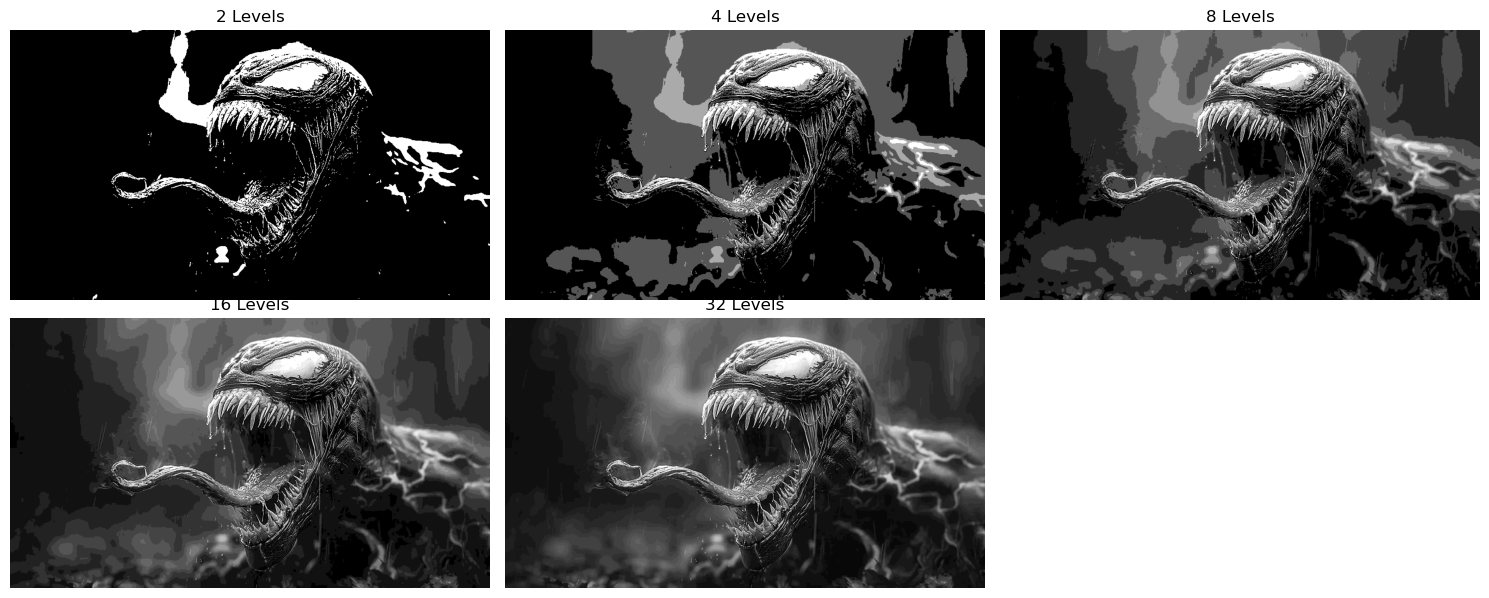

In [15]:
quant_levels = [2, 4, 8, 16, 32]
plt.figure(figsize=(15, 6))
for i, level in enumerate(quant_levels):
    quant = quantize_image(gray, level)
    plt.subplot(2, 3, i+1)
    plt.imshow(quant, cmap='gray')
    plt.title(f"{level} Levels")
    plt.axis('off')
plt.tight_layout()
plt.show()

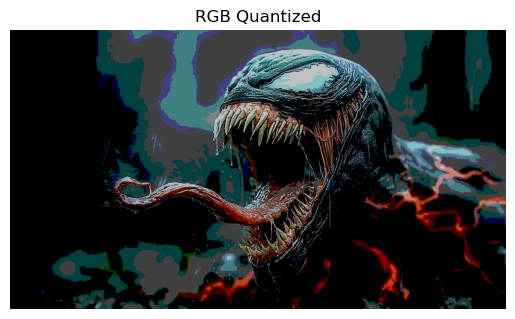


Unique R levels: [  0  64 128 192]
Unique G levels: [  0  64 128 192]
Unique B levels: [  0  64 128 192]

Unique H levels: [  0  10  15  30  60  75  90 105 120 150 165]
Unique S levels: [  0  85 128 170 255]
Unique V levels: [  0  64 128 192]


In [17]:
quant_rgb = (image // 64) * 64  # 4 levels per channel
plt.imshow(cv2.cvtColor(quant_rgb, cv2.COLOR_BGR2RGB))
plt.title("RGB Quantized")
plt.axis('off')
plt.show()

analyze_quantized_levels(quant_rgb, 'RGB')
analyze_quantized_levels(quant_rgb, 'HSV')